## Set Up

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv

from pprint import pprint

# Import DATA.GOV API key
from api_keys import km_dg_key

# Output File (CSV)
output_data_file = "output_data/fbi_crime_data_state.csv"

## Get state abbreviations

In [36]:
#Pull all pages for the data for each state 
state_qry = "https://api.usa.gov/crime/fbi/sapi/api/states?api_key=" + km_dg_key 
state_results_1 = requests.get(state_qry, params={'page':0}).json()
state_results_2 = requests.get(state_qry, params={'page':1}).json()
state_results_3 = requests.get(state_qry, params={'page':2}).json()

#Make DFs for each page of data
sr1_df = pd.DataFrame(state_results_1['results'])
sr2_df = pd.DataFrame(state_results_2['results'])
sr3_df = pd.DataFrame(state_results_3['results'])

#Combine DFs of each page into one DF for all data
state_data = pd.concat([sr1_df, sr2_df, sr3_df])
state_data.head()

,region_code,state_abbr,state_fips_code,state_id,state_name
0,4,AK,2.0,1,Alaska
1,3,AL,1.0,2,Alabama
2,3,AR,5.0,3,Arkansas
3,99,AS,60.0,4,American Samoa
4,4,AZ,4.0,5,Arizona


## Get victim relationship data (relDF_base)

In [37]:
#This is the same series created before
states = (state_data.iloc[:,1]).astype(str)

#Open an empty list to initialize a dataframe
empty_list = []

relDF_base = pd.DataFrame(empty_list)

#Creating columns on list based on the returned data for one state
relDF_base["State"] = ""
relDF_base["Year"] = ""
relDF_base["Acquaintance"] = ""
relDF_base["Babysittee"] = ""
relDF_base["Boyfriend or Girlfriend"] = ""
relDF_base["Child of Boyfriend or Girlfriend"] = ""
relDF_base["Child"] = ""
relDF_base["Common Law Spouse"] = ""
relDF_base["Employee"] = ""
relDF_base["Employer"] = ""
relDF_base["Friend"] = ""
relDF_base["Grandchild"] = ""
relDF_base["Grandparent"] = ""
relDF_base["Homosexual Relationship"] = ""
relDF_base["In-Law"] = ""
relDF_base["Neighbor"] = ""
relDF_base["Other Family Member"] = ""
relDF_base["Otherwise Known"] = ""
relDF_base["Parent"] = ""
relDF_base["Unknown"] = ""
relDF_base["Sibling"] = ""
relDF_base["Stepchild"] = ""
relDF_base["Spouse"] = ""
relDF_base["Stepparent"] = ""
relDF_base["Stepsibling"] = ""
relDF_base["Stranger"] = ""
relDF_base["Offender"] = ""
relDF_base["Ex-Spouse"] = ""

#Loop through data to create the dataframe

for i in states:
    
    state = i 
    
    rel_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/states/"+ state +"/relationship?api_key=" + km_dg_key
    rel_response_state = requests.get(rel_query_url).json()
    
    for i in rel_response_state['results']:
        
        relDF_base = relDF_base.append({'State': state, 
                          'Year': i['data_year'], 
                          'Acquaintance': i['acquaintance'],
                          'Babysittee' : i['babysittee'],
                          'Boyfriend or Girlfriend' : i['boyfriend_girlfriend'],
                          'Child of Boyfriend or Girlfriend' : i['child_boyfriend_girlfriend'],
                          'Child' : i['child'],
                          'Common Law Spouse' : i['common_law_spouse'],
                          'Employee' : i['employee'],
                          'Employer' : i['employer'],
                          'Friend' : i['friend'],
                          'Grandchild' : i['grandchild'],
                          'Grandparent' : i['grandparent'],
                          'Homosexual Relationship' : i['homosexual_relationship'],
                          'In-Law' : i['in_law'],
                          'Neighbor' : i['neighbor'],
                          'Other Family Member' : i['other_family_member'],
                          'Otherwise Known' : i['otherwise_known'],
                          'Parent' : i['parent'],
                          'Unknown' : i['relationship_unknown'],
                          'Sibling' : i['sibling'],
                          'Stepchild' : i['stepchild'],
                          'Spouse' : i['spouse'],
                          'Stepparent' : i['stepparent'],
                          'Stepsibling' : i['stepsibling'],
                          'Stranger' : i['stranger'],
                          'Offender' : i['offender'],
                          'Ex-Spouse' : i['ex_spouse'],
                             },
                          ignore_index = True)

relDF_base.head()

,State,Year,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,...,Parent,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse
0,AL,1991,136,0,48,0,9,4,3,0,...,7,86,6,0,38,2,0,179,0,6
1,AL,1992,76,0,17,0,7,5,0,0,...,3,126,4,1,20,1,0,45,0,4
2,AL,2006,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
3,AL,2008,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,AL,2009,0,0,1,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


## Filter years to 2007-2017

In [38]:
#Change to numeric
relDF_base["Year"] = pd.to_numeric(relDF_base["Year"])
relDF_base["Acquaintance"] = pd.to_numeric(relDF_base["Acquaintance"])
relDF_base["Babysittee"] = pd.to_numeric(relDF_base["Babysittee"])
relDF_base["Boyfriend or Girlfriend"] = pd.to_numeric(relDF_base["Boyfriend or Girlfriend"])
relDF_base["Child of Boyfriend or Girlfriend"] = pd.to_numeric(relDF_base["Child of Boyfriend or Girlfriend"])
relDF_base["Child"] = pd.to_numeric(relDF_base["Child"])
relDF_base["Common Law Spouse"] = pd.to_numeric(relDF_base["Common Law Spouse"])
relDF_base["Employee"] = pd.to_numeric(relDF_base["Employee"])
relDF_base["Employer"] = pd.to_numeric(relDF_base["Employer"])
relDF_base["Friend"] = pd.to_numeric(relDF_base["Friend"])
relDF_base["Grandchild"] = pd.to_numeric(relDF_base["Grandchild"])
relDF_base["Grandparent"] = pd.to_numeric(relDF_base["Grandparent"])
relDF_base["Homosexual Relationship"] = pd.to_numeric(relDF_base["Homosexual Relationship"])
relDF_base["In-Law"] = pd.to_numeric(relDF_base["In-Law"])
relDF_base["Neighbor"] = pd.to_numeric(relDF_base["Neighbor"])
relDF_base["Other Family Member"] = pd.to_numeric(relDF_base["Other Family Member"])
relDF_base["Otherwise Known"] = pd.to_numeric(relDF_base["Otherwise Known"])
relDF_base["Parent"] = pd.to_numeric(relDF_base["Parent"])
relDF_base["Unknown"] = pd.to_numeric(relDF_base["Unknown"])
relDF_base["Sibling"] = pd.to_numeric(relDF_base["Sibling"])
relDF_base["Stepchild"] = pd.to_numeric(relDF_base["Stepchild"])
relDF_base["Spouse"] = pd.to_numeric(relDF_base["Spouse"])
relDF_base["Stepparent"] = pd.to_numeric(relDF_base["Stepparent"])
relDF_base["Stepsibling"] = pd.to_numeric(relDF_base["Stepsibling"])
relDF_base["Stranger"] = pd.to_numeric(relDF_base["Stranger"])
relDF_base["Offender"] = pd.to_numeric(relDF_base["Offender"])
relDF_base["Ex-Spouse"] = pd.to_numeric(relDF_base["Ex-Spouse"])

#Filter to years 2007-2017 - ORIGINAL
##relDF_base["Year"] = pd.to_numeric(relDF_base["Year"])
relDF = relDF_base.loc[(relDF_base["Year"] >= 2007) & (relDF_base["Year"] <= 2017), :]

#Reset the index
relDF = relDF.reset_index()
relDF = relDF.drop(axis=1, columns=["index"])
    
#Check dataframe:
relDF.head(10)

,State,Year,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,...,Parent,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse
0,AL,2008,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,AL,2009,0,0,1,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,AL,2010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AL,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,AL,2013,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,AL,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,AL,2015,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,AL,2016,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,0,0
8,AL,2017,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,AR,2007,22,0,6,0,1,0,0,0,...,3,62,4,0,7,1,0,13,0,0


<font color=blue>

## STACKED BAR: ALL RELATIONSHIPS 2007-2017 BY STATE

#### Grouped By State, Sum Years for Each State, Add Total Column

In [39]:
#Group by state:
grouprelDFState = relDF.groupby(["State"]).sum()

#Drop year and "unknown":
relStatePercDF = grouprelDFState.drop(axis=1, columns=["Year", "Unknown"])

col_list= list(relStatePercDF)
col_list

relStatePercDF['Total Homicides'] = relStatePercDF[col_list].sum(axis=1)

#### Change DF to Percentages (relStatePercDF)

In [40]:
relStatePercDF["Acquaintance"] = (relStatePercDF["Acquaintance"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Babysittee"] = (relStatePercDF["Babysittee"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Boyfriend or Girlfriend"] = (relStatePercDF["Boyfriend or Girlfriend"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Child of Boyfriend or Girlfriend"] = (relStatePercDF["Child of Boyfriend or Girlfriend"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Child"] = (relStatePercDF["Child"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Common Law Spouse"] = (relStatePercDF["Common Law Spouse"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Employee"] = (relStatePercDF["Employee"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Employer"] = (relStatePercDF["Employer"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Friend"] = (relStatePercDF["Friend"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Grandchild"] = (relStatePercDF["Grandchild"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Grandparent"] = (relStatePercDF["Grandparent"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Homosexual Relationship"] = (relStatePercDF["Homosexual Relationship"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["In-Law"] = (relStatePercDF["In-Law"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Neighbor"] = (relStatePercDF["Neighbor"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Other Family Member"] = (relStatePercDF["Other Family Member"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Otherwise Known"] = (relStatePercDF["Otherwise Known"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Parent"] = (relStatePercDF["Parent"] / relStatePercDF["Total Homicides"]) * 100
#relStatePercDF["Unknown"] = (relStatePercDF["Unknown"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Sibling"] = (relStatePercDF["Sibling"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Stepchild"] = (relStatePercDF["Stepchild"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Spouse"] = (relStatePercDF["Spouse"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Stepparent"] = (relStatePercDF["Stepparent"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Stepsibling"] = (relStatePercDF["Stepsibling"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Stranger"] = (relStatePercDF["Stranger"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Offender"] = (relStatePercDF["Offender"] / relStatePercDF["Total Homicides"]) * 100
relStatePercDF["Ex-Spouse"] = (relStatePercDF["Ex-Spouse"] / relStatePercDF["Total Homicides"]) * 100

relStatePercDF.head()

,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,Friend,Grandchild,...,Parent,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse,Total Homicides
State,,,,,,,,,,,,,,,,,,,,,
AL,18.181818,0.000000,9.090909,0.000000,4.545455,0.000000,0.000000,0.000000,0.000000,0.00000,...,4.545455,4.545455,0.000000,4.545455,0.000000,0.000000,31.818182,0.000000,0.000000,22
AR,32.349949,0.203459,8.952187,0.915565,4.069176,0.305188,0.000000,0.203459,4.781282,0.00000,...,2.238047,2.339776,0.508647,8.036623,0.712106,0.101729,12.207528,1.017294,0.712106,983
AZ,16.788321,0.000000,9.489051,0.000000,20.437956,0.000000,0.000000,0.729927,4.379562,0.00000,...,2.189781,1.459854,0.729927,5.839416,0.729927,0.000000,22.627737,0.729927,2.189781,137
CO,25.491525,0.474576,6.847458,0.881356,6.779661,0.677966,0.135593,0.271186,4.542373,0.20339,...,3.186441,1.152542,0.881356,8.000000,0.542373,0.000000,24.813559,0.677966,0.949153,1475
CT,26.875000,0.833333,8.125000,0.833333,4.791667,0.625000,0.416667,0.000000,4.166667,0.62500,...,3.333333,0.833333,0.416667,5.416667,0.000000,0.000000,22.500000,1.250000,0.625000,480


#### Stacked Bar Chart

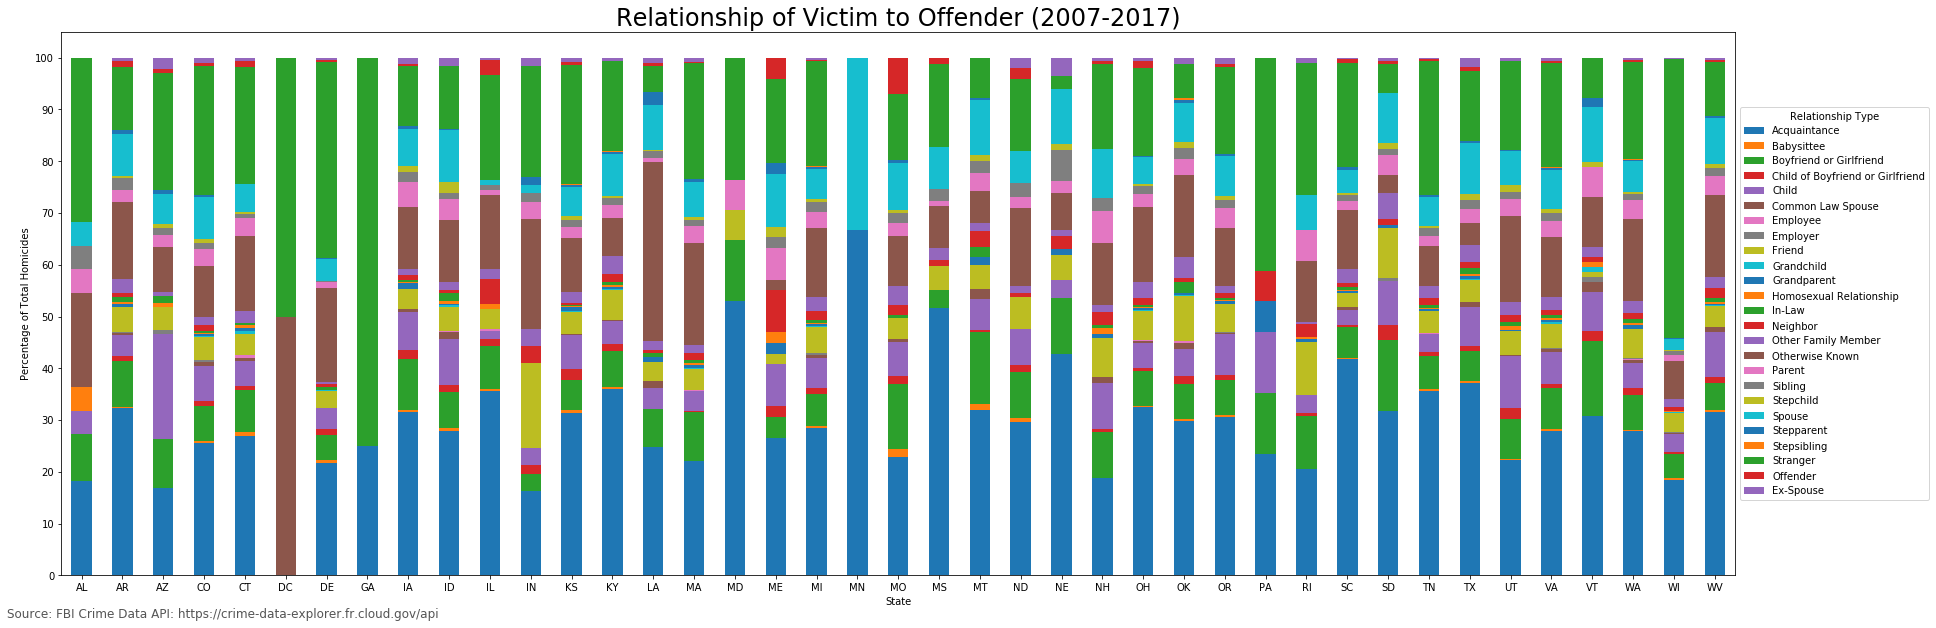

In [41]:
#Drop the Total Homicides column so it isn't included in the chart
relStatePercDFNoTotal = relStatePercDF.drop(axis=1, columns=["Total Homicides"])

#Plot stacked bar chart
relStatePercDFNoTotal.plot(kind='bar',
                           stacked=True, 
                           figsize=(30,10),
                           rot=0
                           )
plt.title("Relationship of Victim to Offender (2007-2017)", fontsize=24, ha='center')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Relationship Type")
plt.xlabel("State")
plt.ylabel("Percentage of Total Homicides")
plt.yticks(np.arange(0, 101, 10))
plt.figtext(0.1, .08, "Source: FBI Crime Data API: https://crime-data-explorer.fr.cloud.gov/api",\
            horizontalalignment="left", \
            verticalalignment="top", fontsize=12, color="#555555")

#Save image
plt.savefig("Image_RelVictimToOffenderAllYears.png")

<font color=blue>

## LINE CHART: TOTAL HOMICIDES 2007-2017 (ALL)

#### Created DF (groupedYear)

In [42]:
groupedYear = relDF.groupby(["Year"]).sum()

#### Create Line Chart

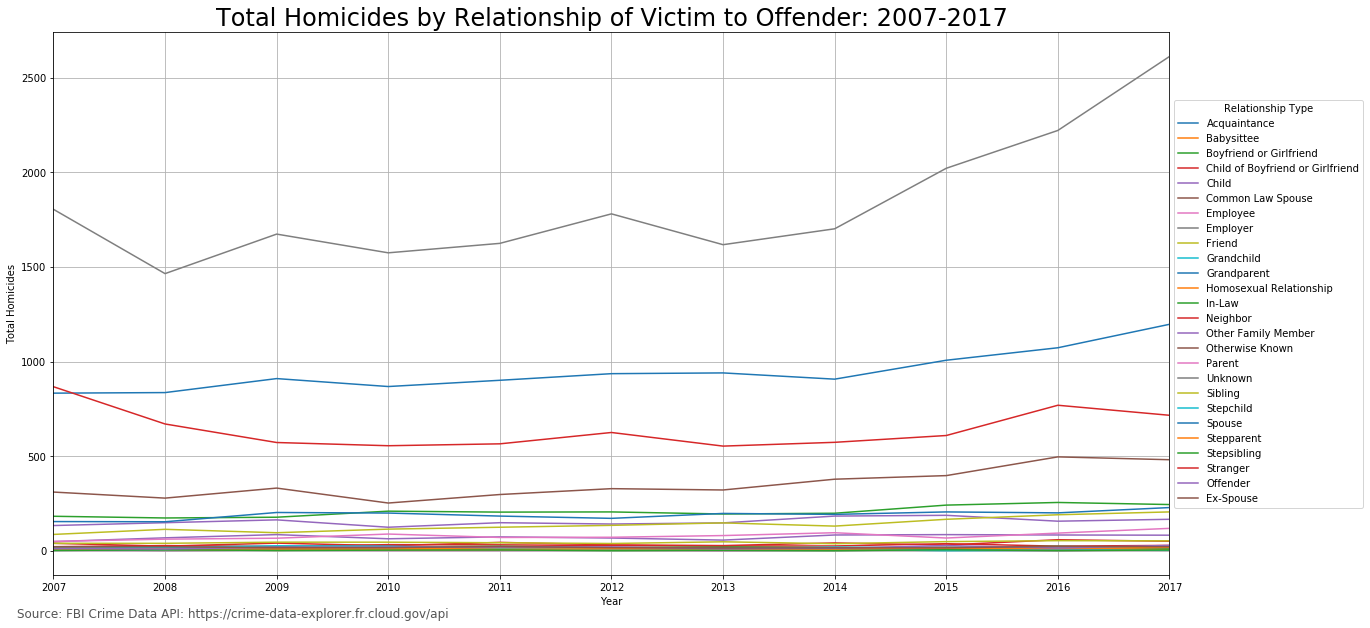

In [44]:
#Plot line chart
groupedYear.plot.line(figsize=(20,10))

plt.title("Total Homicides by Relationship of Victim to Offender: 2007-2017", fontsize=24, ha='center')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Relationship Type")
plt.xlabel("Year")
plt.ylabel("Total Homicides")
plt.xticks(np.arange(2007, 2018, 1.0))
plt.grid()
plt.figtext(0.1, .08, "Source: FBI Crime Data API: https://crime-data-explorer.fr.cloud.gov/api",\
            horizontalalignment="left", \
            verticalalignment="top", fontsize=12, color="#555555")

#Save image
plt.savefig("Image_TotalHomicides2007-2017All.png")

<font color=blue>

## LINE CHART: TOTAL HOMICIDES 2007-2017 (GROUPS)

#### Create DF (groupedYearConsolidated)

In [45]:
groupedYear["Friend"] = groupedYear["Acquaintance"] + \
                        groupedYear["Friend"] + \
                        groupedYear["Neighbor"]
                        
groupedYear["Professional"] = groupedYear["Babysittee"] + \
                              groupedYear["Employee"] + \
                              groupedYear["Employer"]
                        
groupedYear["Intimate Partner"] = groupedYear["Boyfriend or Girlfriend"] + \
                                  groupedYear["Common Law Spouse"] + \
                                  groupedYear["Spouse"] + \
                                  groupedYear["Ex-Spouse"] + \
                                  groupedYear["Homosexual Relationship"]

groupedYear["Family"] = groupedYear["Child"] + \
                        groupedYear["Child of Boyfriend or Girlfriend"] + \
                        groupedYear["Parent"] + \
                        groupedYear["Sibling"] + \
                        groupedYear["Stepchild"] + \
                        groupedYear["Stepparent"] + \
                        groupedYear["Stepsibling"] + \
                        groupedYear["Grandchild"] + \
                        groupedYear["Grandparent"] + \
                        groupedYear["In-Law"] + \
                        groupedYear["Other Family Member"]

groupedYear["Not Related"] = groupedYear["Otherwise Known"] + \
                             groupedYear["Stranger"] + \
                             groupedYear["Offender"]

groupedYearConsolidated = groupedYear[["Intimate Partner", 
                                       "Family", 
                                       "Friend", 
                                       "Professional",
                                       "Not Related"]]

groupedYearConsolidated.head()

,Intimate Partner,Family,Friend,Professional,Not Related
Year,,,,,
2007,375,349,958,18,1189
2008,369,399,973,13,957
2009,410,442,1045,12,921
2010,446,423,1008,14,826
2011,434,444,1069,16,881


#### Create Line Chart

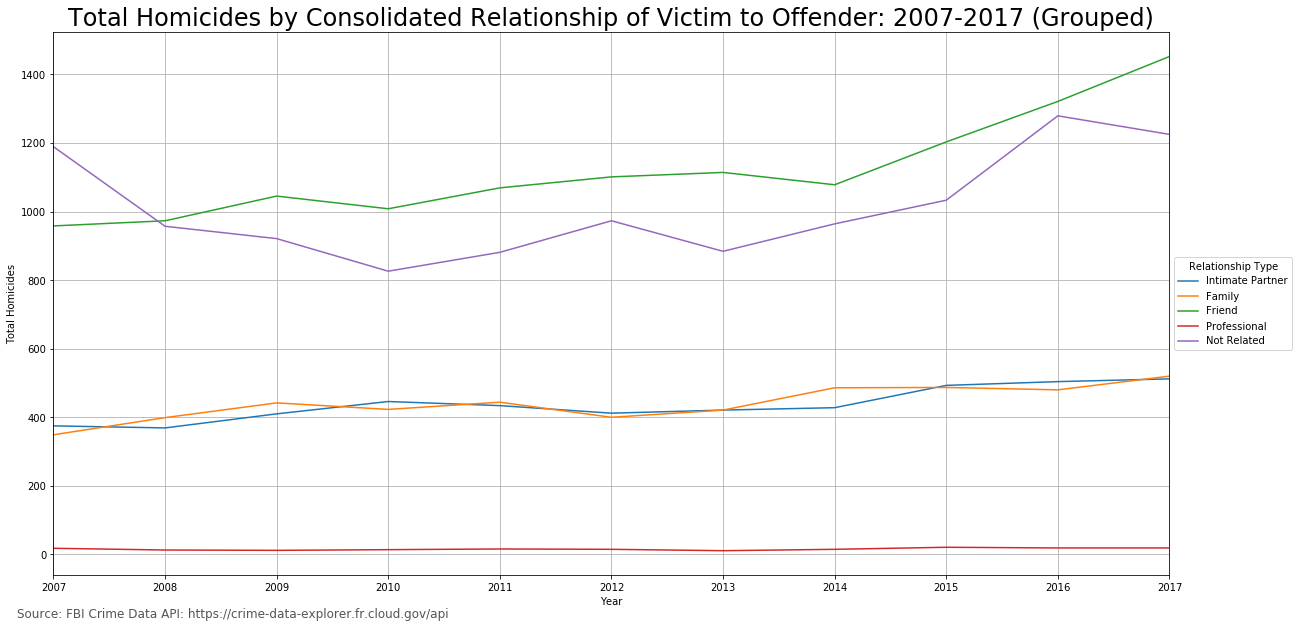

In [46]:
groupedYearConsolidated.plot.line(figsize=(20,10))

plt.title("Total Homicides by Consolidated Relationship of Victim to Offender: 2007-2017 (Grouped)", fontsize=24, ha='center')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Relationship Type")
plt.xlabel("Year")
plt.ylabel("Total Homicides")
plt.xticks(np.arange(2007, 2018, 1.0))
plt.grid()
plt.figtext(0.1, .08, "Source: FBI Crime Data API: https://crime-data-explorer.fr.cloud.gov/api",\
            horizontalalignment="left", \
            verticalalignment="top", fontsize=12, color="#555555")

#Save image
plt.savefig("Image_TotalHomicides2007-2017Consolidated.png")

<font color=blue>

## CHOROPLETH MAPS: HOMICIDES BY GROUPED TYPE 2007-2017

#### Import Geopandas and Matplotlib

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

#### Import shapefile for US States

In [47]:
# Set the filepath and load in a shapefile
fp = "Resources/tl_2018_us_state/tl_2018_us_state.shp"
map_df = gpd.read_file(fp)

# Drop everything except continental states
map_df = map_df.loc[map_df["NAME"] != "Commonwealth of the Northern Mariana Islands", :]
map_df = map_df.loc[map_df["NAME"] != "Guam", :]
map_df = map_df.loc[map_df["NAME"] != "American Samoa", :]
map_df = map_df.loc[map_df["NAME"] != "Puerto Rico", :]
map_df = map_df.loc[map_df["NAME"] != "Hawaii", :]
map_df = map_df.loc[map_df["NAME"] != "Alaska", :]
map_df = map_df.loc[map_df["NAME"] != "United States Virgin Islands", :]
map_df = map_df.reset_index()
map_df.head()

,index,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266474513,489028543,+38.6472854,-080.6183274,"POLYGON ((-81.747254 39.095379, -81.746354 39...."
1,1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138949136250,31361101223,+28.4574302,-082.4091477,"(POLYGON ((-86.38864599999999 30.994181, -86.3..."
2,2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143780567633,6214824948,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.64..."
3,3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206228939448,18945217189,+46.3159573,-094.1996043,"POLYGON ((-96.784381 46.63050399999999, -96.78..."
4,4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151100280,6979966958,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.458..."


#### Group Categories

In [48]:
relDF["Friend"] = relDF["Acquaintance"] + \
                  relDF["Friend"] + \
                  relDF["Neighbor"]
                        
relDF["Professional"] = relDF["Babysittee"] + \
                        relDF["Employee"] + \
                        relDF["Employer"]
                        
relDF["Intimate Partner"] = relDF["Boyfriend or Girlfriend"] + \
                            relDF["Homosexual Relationship"] + \
                            relDF["Spouse"] + \
                            relDF["Ex-Spouse"] + \
                            relDF["Common Law Spouse"]

relDF["Family"] = relDF["Child"] + \
                            relDF["Parent"] + \
                            relDF["Sibling"] + \
                            relDF["Stepchild"] + \
                            relDF["Stepparent"] + \
                            relDF["Stepsibling"] + \
                            relDF["Child of Boyfriend or Girlfriend"] + \
                            relDF["Grandchild"] + \
                            relDF["Grandparent"] + \
                            relDF["In-Law"] + \
                            relDF["Other Family Member"]

relDF["Not Related"] = relDF["Otherwise Known"] + \
                       relDF["Stranger"] + \
                       relDF["Offender"]

relDF2017consolidated = relDF[["State",
                               "Year",
                               "Intimate Partner", 
                               "Family", 
                               "Friend", 
                               "Professional",
                               "Not Related"]]

#### Create dataframe

In [15]:
groupedconsolidated = relDF2017consolidated.groupby(["State"]).sum()
groupedconsolidated = groupedconsolidated.drop(axis=1, columns=["Year"])
groupedconsolidated = groupedconsolidated.reset_index()
groupedconsolidated = groupedconsolidated.rename(columns = {"State": "STUSPS"})
groupedconsolidated.head()

,STUSPS,Intimate Partner,Family,Friend,Professional,Not Related
0,AL,4,3,4,0,11
1,AR,181,149,373,4,276
2,AZ,25,38,29,1,44
3,CO,246,232,462,13,522
4,CT,74,67,149,6,184


#### Merge shapefile and homicides dataframe

In [49]:
merged = pd.merge(map_df, groupedconsolidated, on="STUSPS", how="outer")
merged = merged.fillna(0)
merged.head()

,index,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,...,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Intimate Partner,Family,Friend,Professional,Not Related
0,0,3,5,54,01779805,54,WV,West Virginia,00,G4000,...,62266474513,489028543,+38.6472854,-080.6183274,"POLYGON ((-81.747254 39.095379, -81.746354 39....",120.0,151.0,289.0,3.0,205.0
1,1,3,5,12,00294478,12,FL,Florida,00,G4000,...,138949136250,31361101223,+28.4574302,-082.4091477,"(POLYGON ((-86.38864599999999 30.994181, -86.3...",0.0,0.0,0.0,0.0,0.0
2,2,2,3,17,01779784,17,IL,Illinois,00,G4000,...,143780567633,6214824948,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.64...",22.0,14.0,92.0,2.0,78.0
3,3,2,4,27,00662849,27,MN,Minnesota,00,G4000,...,206228939448,18945217189,+46.3159573,-094.1996043,"POLYGON ((-96.784381 46.63050399999999, -96.78...",1.0,0.0,2.0,0.0,0.0
4,4,3,5,24,01714934,24,MD,Maryland,00,G4000,...,25151100280,6979966958,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.458...",2.0,1.0,10.0,0.0,4.0


#### Choropleth: Intimate Partners

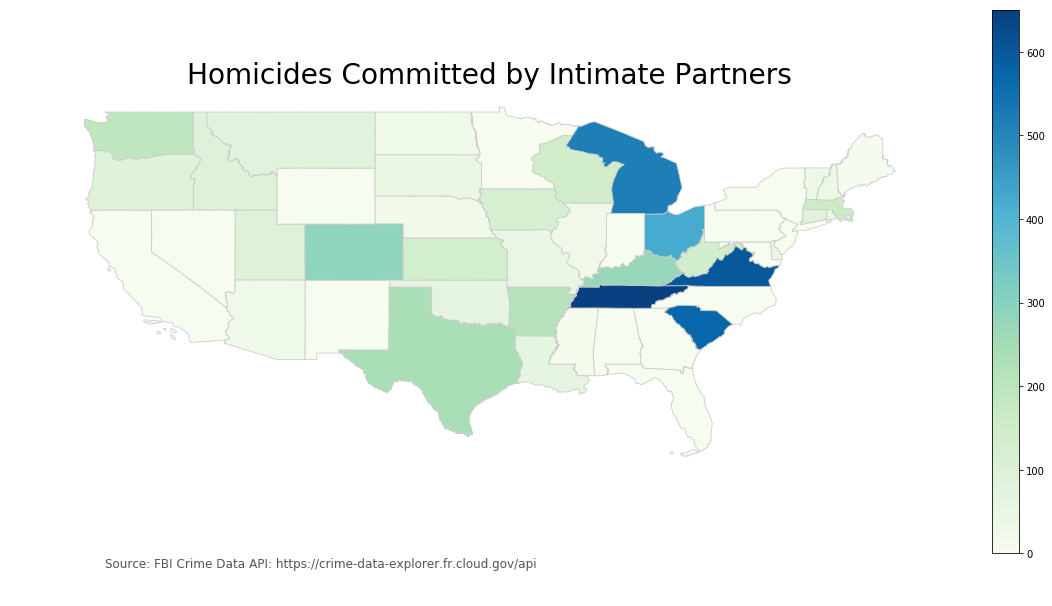

In [63]:
#Variable to be mapped
mapped_variable = "Intimate Partner"

#Range for the choropleth
vmin, vmax = 0, 650

#Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

#Create map
immediate_map = merged.plot(column=mapped_variable, cmap="GnBu", linewidth=0.8, \
                            edgecolor="0.8", figsize=(10, 10), ax=ax)

#Remove the axis
ax.axis("off")

#Set title
ax.set_title("Homicides Committed by Intimate Partners", fontsize="28", y=1.5)

#Create an annotation for the data source
ax.annotate("Source: FBI Crime Data API: https://crime-data-explorer.fr.cloud.gov/api",\
            xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", \
            verticalalignment="top", fontsize=12, color="#555555")

#Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="GnBu", norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Empty array for the data range
sm._A = []

#Add the colorbar to the figure
cbar = fig.colorbar(sm)

#Save
fig.savefig("map_intimatepartnersChoro11.png", dpi=300)

#### Choropleth: Family

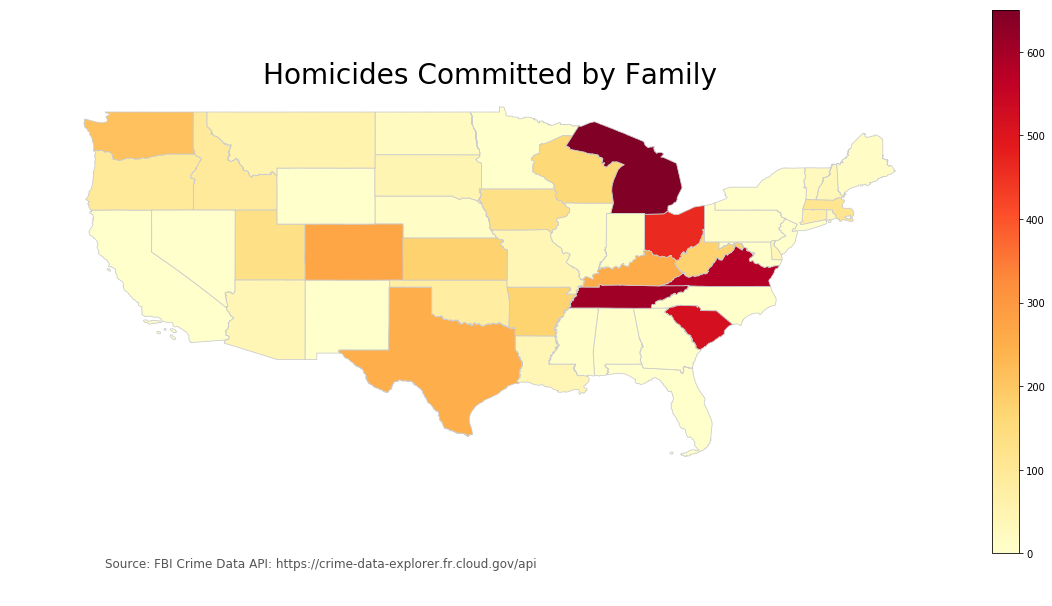

In [68]:
#Variable to be mapped
mapped_variable = "Family"

#Range for the choropleth
vmin, vmax = 0, 650

#Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

#Create map
immediate_map = merged.plot(column=mapped_variable, cmap="YlOrRd", linewidth=0.8, \
                            edgecolor="0.8", figsize=(10, 10), ax=ax)

#Remove the axis
ax.axis("off")

#Set title
ax.set_title("Homicides Committed by Family", fontsize="28", y=1.5)

#Create an annotation for the data source
ax.annotate("Source: FBI Crime Data API: https://crime-data-explorer.fr.cloud.gov/api",\
            xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", \
            verticalalignment="top", fontsize=12, color="#555555")

#Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Empty array for the data range
sm._A = []

#Add the colorbar to the figure
cbar = fig.colorbar(sm)

#Save
fig.savefig("map_familyChoro.png", dpi=300)

#### Choropleth: Friends

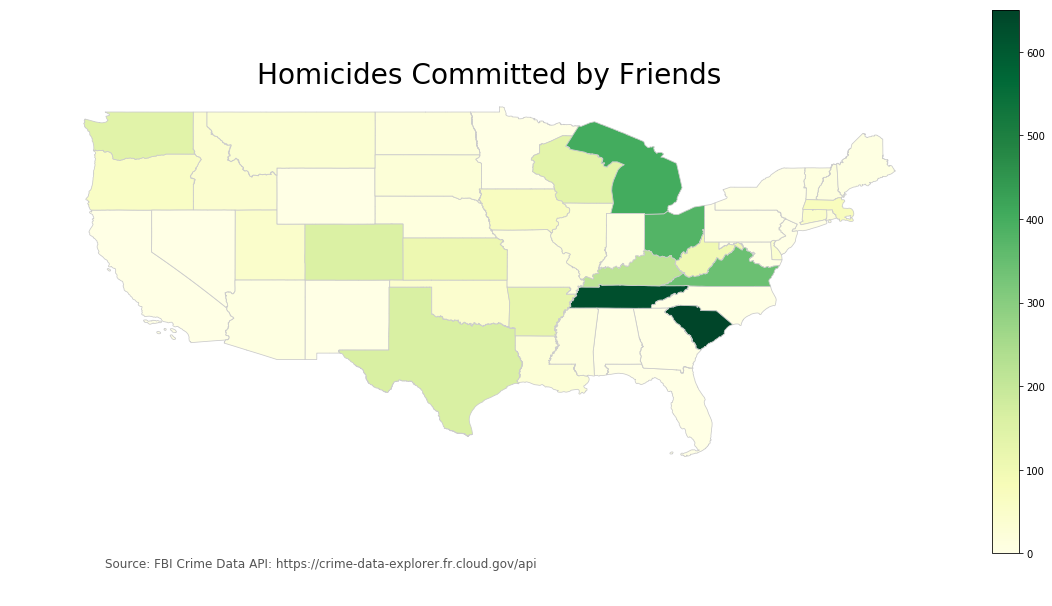

In [72]:
#Variable to be mapped
mapped_variable = "Friend"

#Range for the choropleth
vmin, vmax = 0, 650

#Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

#Create map
immediate_map = merged.plot(column=mapped_variable, cmap="YlGn", linewidth=0.8, \
                            edgecolor="0.8", figsize=(10, 10), ax=ax)

#Remove the axis
ax.axis("off")

#Set title
ax.set_title("Homicides Committed by Friends", fontsize="28", y=1.5)

#Create an annotation for the data source
ax.annotate("Source: FBI Crime Data API: https://crime-data-explorer.fr.cloud.gov/api",\
            xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", \
            verticalalignment="top", fontsize=12, color="#555555")

#Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="YlGn", norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Empty array for the data range
sm._A = []

#Add the colorbar to the figure
cbar = fig.colorbar(sm)

#Save
fig.savefig("map_friendChoro.png", dpi=300)

#### Choropleth: Professional

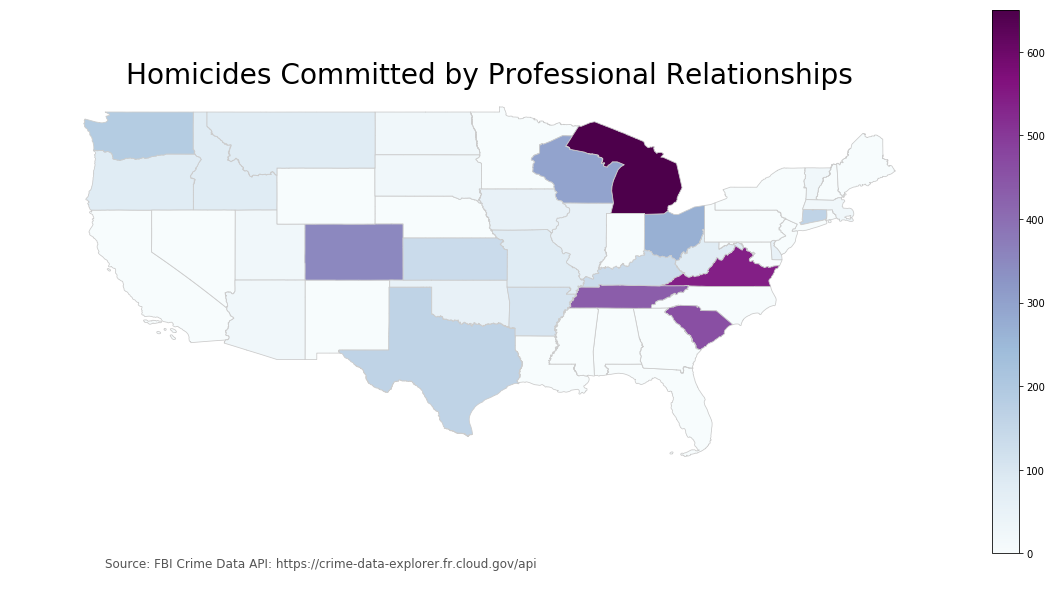

In [70]:
#Variable to be mapped
mapped_variable = "Professional"

#Range for the choropleth
vmin, vmax = 0, 650

#Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

#Create map
immediate_map = merged.plot(column=mapped_variable, cmap="BuPu", linewidth=0.8, \
                            edgecolor="0.8", figsize=(10, 10), ax=ax)

#Remove the axis
ax.axis("off")

#Set title
ax.set_title("Homicides Committed by Professional Relationships", fontsize="28", y=1.5)

#Create an annotation for the data source
ax.annotate("Source: FBI Crime Data API: https://crime-data-explorer.fr.cloud.gov/api",\
            xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", \
            verticalalignment="top", fontsize=12, color="#555555")

#Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="BuPu", norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Empty array for the data range
sm._A = []

#Add the colorbar to the figure
cbar = fig.colorbar(sm)

#Save
fig.savefig("map_professionalChoro.png", dpi=300)

#### Choropleth: Not Related

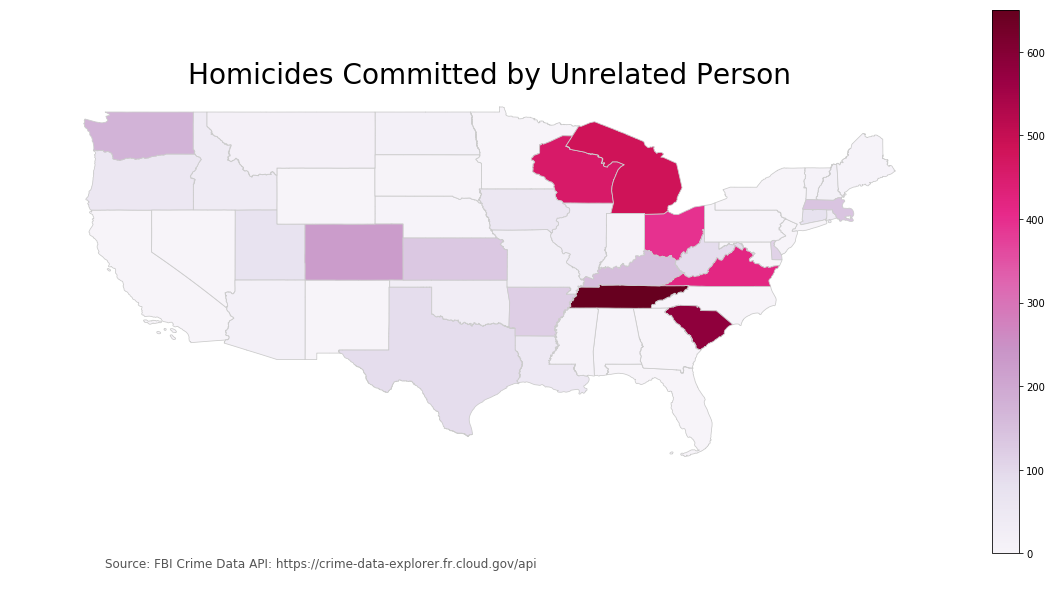

In [71]:
#Variable to be mapped
mapped_variable = "Not Related"

#Range for the choropleth
vmin, vmax = 0, 650

#Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

#Create map
immediate_map = merged.plot(column=mapped_variable, cmap="PuRd", linewidth=0.8, \
                            edgecolor="0.8", figsize=(10, 10), ax=ax)

#Remove the axis
ax.axis("off")

#Set title
ax.set_title("Homicides Committed by Unrelated Person", fontsize="28", y=1.5)

#Create an annotation for the data source
ax.annotate("Source: FBI Crime Data API: https://crime-data-explorer.fr.cloud.gov/api",\
            xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", \
            verticalalignment="top", fontsize=12, color="#555555")

#Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="PuRd", norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Empty array for the data range
sm._A = []

#Add the colorbar to the figure
cbar = fig.colorbar(sm)

#Save
fig.savefig("map_notrelatedChoro.png", dpi=300)